### Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import matplotlib
%matplotlib inline

### Loading The Train Dataset  

In [2]:
df_train =pd.read_csv('train_VC.csv',index_col='Loan_ID')

In [3]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df_train.shape

(614, 12)

In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Exploratory Data Analysis 

In [7]:
#Numerical Features

num_feature = [features for features in df_train.columns if df_train[features].dtypes!='O' and features !='Loan_Status']

In [8]:
num_feature

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
# Checking for numerical values with missing values
numerical_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes!='O']

for features in numerical_nan:
    print("{}:{} % missing values".format(features,np.round(df_train[features].isnull().mean(),4)))

LoanAmount:0.0358 % missing values
Loan_Amount_Term:0.0228 % missing values
Credit_History:0.0814 % missing values


In [10]:
# Categorical Columns

cat_feature = [features for features in df_train.columns if df_train[features].dtypes=="O" and features !='Loan_Status']

In [11]:
cat_feature

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [12]:
# Checking with categorical values first

categorical_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes=='O']

for features in categorical_nan:
    print("{}:{} % missing values".format(features,np.round(df_train[features].isnull().mean(),4)))

Gender:0.0212 % missing values
Married:0.0049 % missing values
Dependents:0.0244 % missing values
Self_Employed:0.0521 % missing values


C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


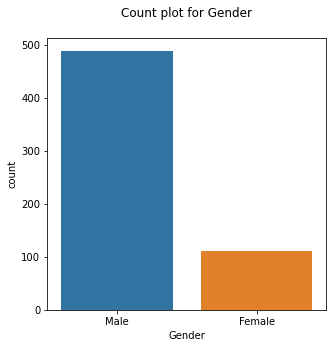

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


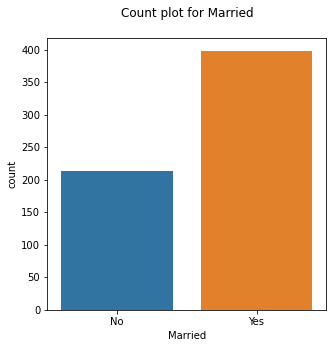

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


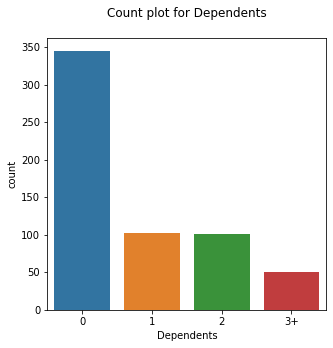

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


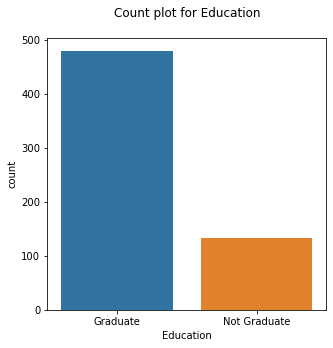

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


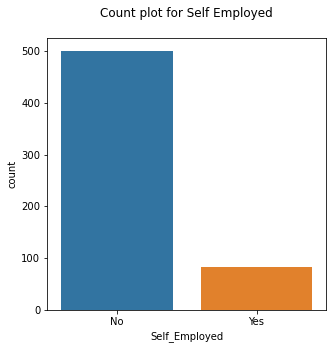

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


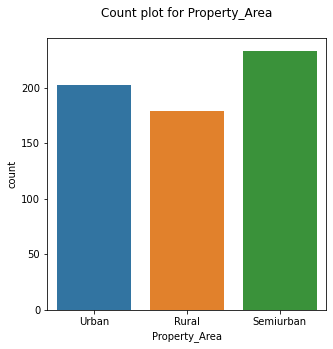

In [13]:
# Plotting Gender attribute

plt.figure(figsize=(5,5))
sns.countplot(df_train["Gender"])
plt.title("Count plot for Gender\n")
plt.show()


# Plotting Married attribute

plt.figure(figsize=(5,5))
sns.countplot(df_train["Married"])
plt.title("Count plot for Married\n")
plt.show()


# Plotting Dependents attribute

plt.figure(figsize=(5,5))
sns.countplot(df_train["Dependents"])
plt.title("Count plot for Dependents\n")
plt.show()



# Plotting Education attribute

plt.figure(figsize=(5,5))
sns.countplot(df_train["Education"])
plt.title("Count plot for Education\n")
plt.show()


# Plotting Self_Employed attribute

plt.figure(figsize=(5,5))
sns.countplot(df_train["Self_Employed"])
plt.title("Count plot for Self Employed\n")
plt.show()


# Plotting Property_Area attribute

plt.figure(figsize=(5,5))
sns.countplot(df_train["Property_Area"])
plt.title("Count plot for Property_Area\n")
plt.show()

**Observations** 


1) The Number of Males are greater than Females who have applied for Loan 


2) Majority of the Loan Apllicants are Married


3) About 250 among the Applicants are Dependents the rest are Self Dependent


4) Majority of the applicants are Graduated 


5) Applicants in the Semiurban region applies for loan morethan Urban and Rurals 

### Frequency Graph  

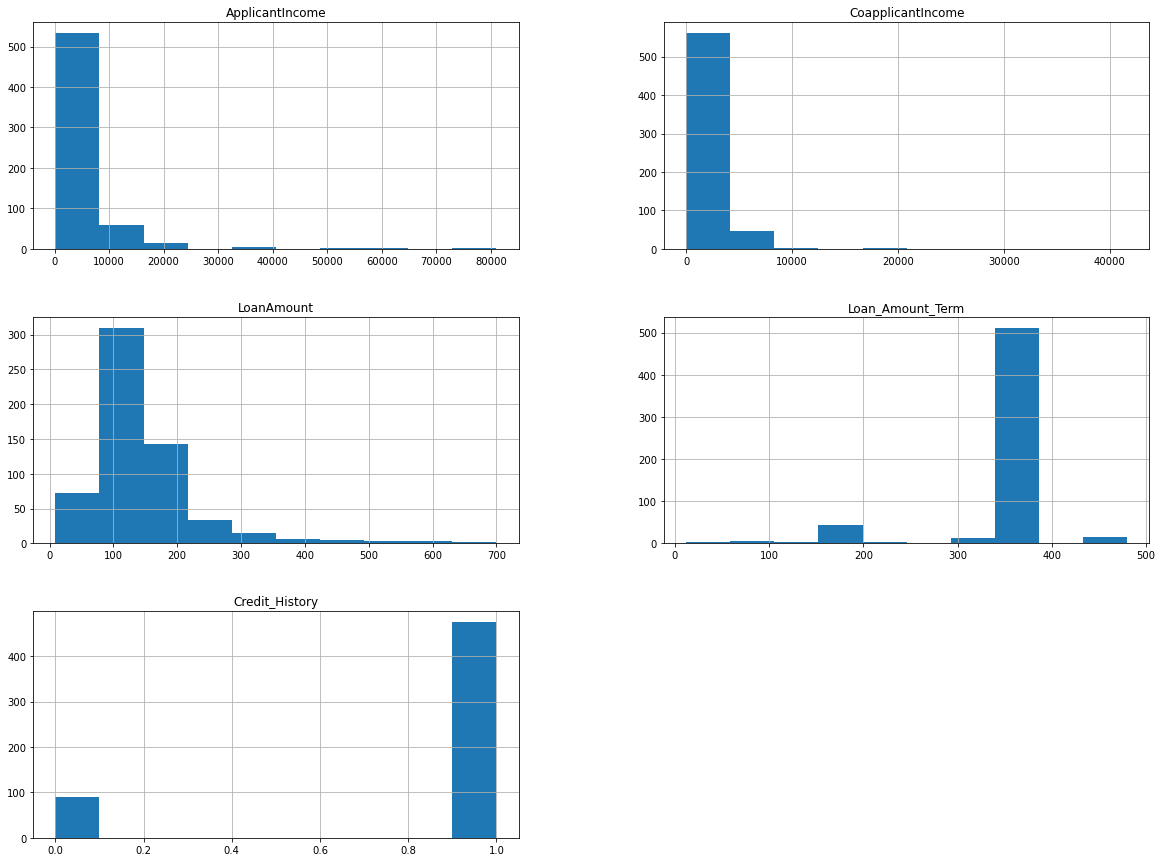

In [14]:
freq_graph = df_train.select_dtypes(include = ["float", "int"])
freq_graph.hist(figsize = (20, 15))
plt.show()

### Preprocessing On Train Data 

In [15]:
#Finding the NUlL Values

df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Filling the missing columns with median 

for i in ['LoanAmount']:
    df_train[i] = df_train[i].fillna(df_train[i].median())
    
    
    
    
# Filling the missing columns with mode

for i in ['Dependents', 'Self_Employed', 'Credit_History', 'Married', 'Gender', 'Loan_Amount_Term']:
    df_train[i] = df_train[i].fillna(df_train[i].mode()[0])

In [17]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Checking Skewness 

In [18]:
df_train.mean()

C:\Users\FISAL\AppData\Local\Temp\ipykernel_10080\2060791882.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.mean()


ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            145.752443
Loan_Amount_Term      342.410423
Credit_History          0.855049
dtype: float64

In [19]:
for i in num_feature:
    skew_data = df_train[i].skew()
    print(skew_data)

6.539513113994625
7.491531216657306
2.743052748820892
-2.4021122563890396
-2.0219705924848985


#### Plotting Skewness 

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


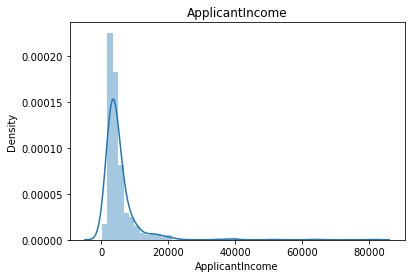

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


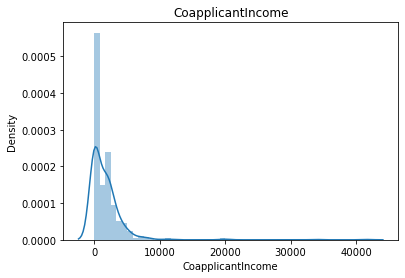

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


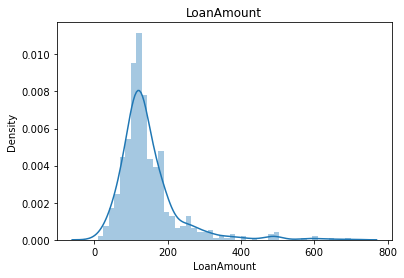

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


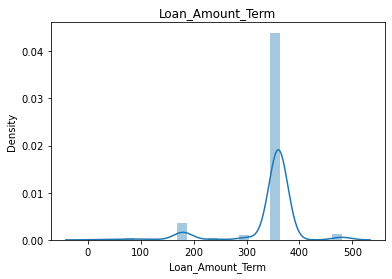

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


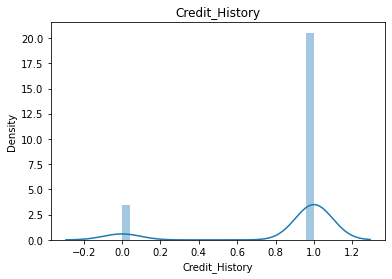

In [20]:
for i in num_feature:
    sns.distplot(df_train[i])
    plt.title(i)
    plt.show()

#### Removing Skewness 


In [21]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson

In [22]:
data = df_train['ApplicantIncome']
transformed_data, lambda_value = boxcox(data)
df_train['ApplicantIncome'] = transformed_data

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


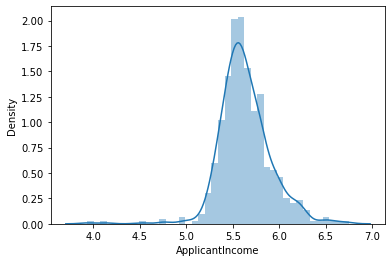

In [23]:
sns.distplot(df_train['ApplicantIncome'])
plt.show()

In [24]:
skew_data = df_train['ApplicantIncome'].skew()
print(skew_data)

-0.09251259759837996


In [25]:
data = df_train['LoanAmount']
transformed_data, lambda_value = boxcox(data)
df_train['LoanAmount'] = transformed_data

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


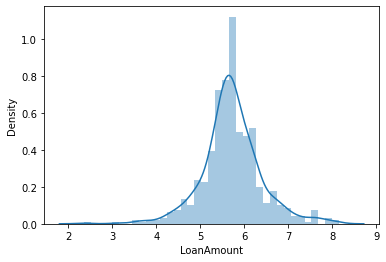

In [26]:
sns.distplot(df_train['LoanAmount'])
plt.show()

In [27]:
skew_data = df_train['LoanAmount'].skew()
print(skew_data)

0.027010910499693855


In [28]:
#Square root transformation in CoapplicantIncome

In [29]:
df_train['CoapplicantIncome']=np.sqrt(df_train['CoapplicantIncome'])

In [30]:
skew_data = df_train['CoapplicantIncome'].skew()
print(skew_data)

0.9795605436152078


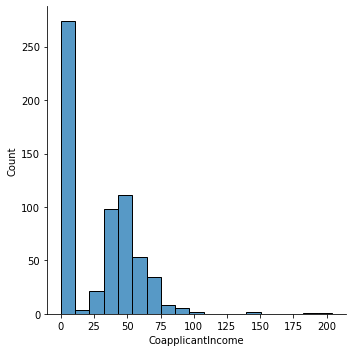

In [31]:
sns.displot(df_train['CoapplicantIncome'])
plt.show()

In [32]:
for i in num_feature:
    skew_data = df_train[i].skew()
    print(skew_data)

-0.09251259759837996
0.9795605436152078
0.027010910499693855
-2.4021122563890396
-2.0219705924848985


#### Outlier 

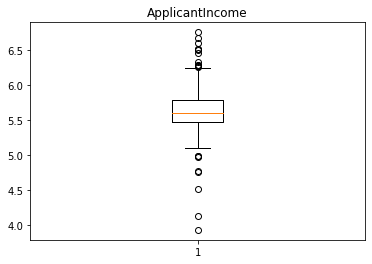

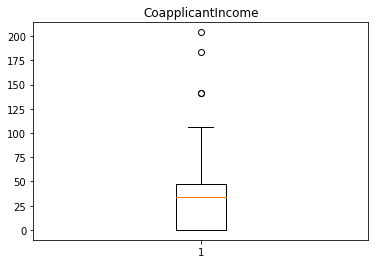

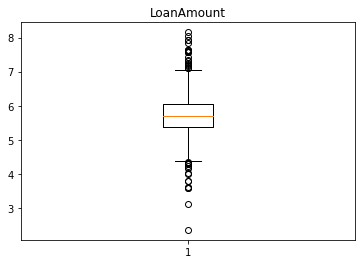

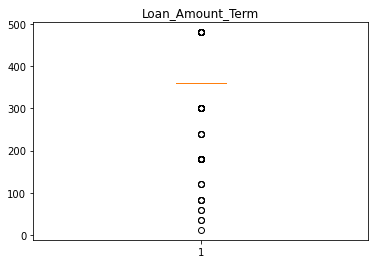

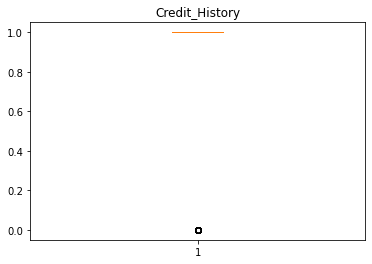

In [33]:
for i in num_feature:
    plt.boxplot(df_train[i])
    plt.title(i)
    plt.show()

**There are outliers present in the Numerical features of the datset we are not dropping the Rows with outliers**

#### Correlation Matrix 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.334921,0.483791,-0.030590,0.012656
CoapplicantIncome,-0.334921,1.000000,0.206937,-0.018517,0.004228
LoanAmount,0.483791,0.206937,1.000000,0.081835,-0.016858
Loan_Amount_Term,-0.030590,-0.018517,0.081835,1.000000,-0.004705
Credit_History,0.012656,0.004228,-0.016858,-0.004705,1.000000


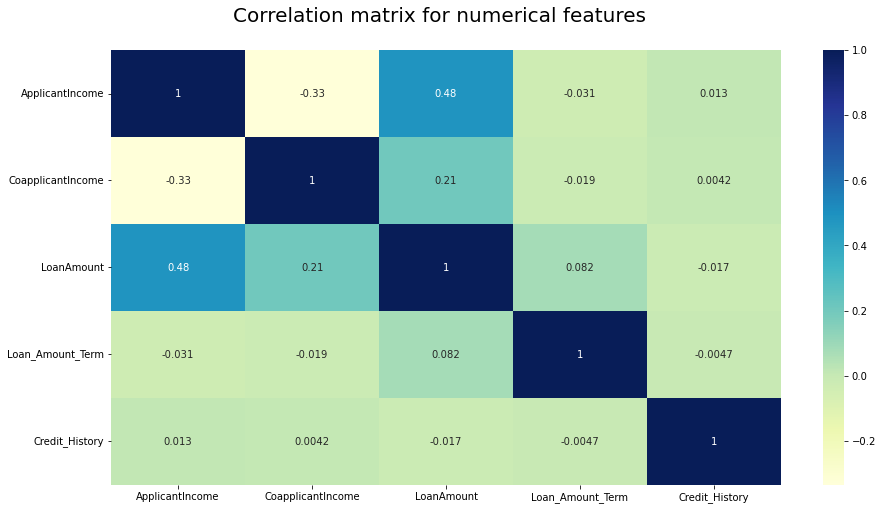

In [34]:
corrmatrix = df_train.corr()
plt.subplots(figsize =(15,8))
plt.title("Correlation matrix for numerical features  \n", size = 20)
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu")
corrmatrix

#### Label Encoding

In [35]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df_train[i] = le.fit_transform(df_train[i])

In [37]:
df_train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5.784390,0.000000,5.697856,360.0,1.0,2,1
LP001003,1,1,1,0,0,5.681299,38.832976,5.697856,360.0,1.0,0,0
LP001005,1,1,0,0,1,5.496074,0.000000,4.810944,360.0,1.0,2,1
LP001006,1,1,0,1,0,5.428743,48.559242,5.609763,360.0,1.0,2,1
LP001008,1,0,0,0,0,5.795017,0.000000,5.830579,360.0,1.0,2,1


#### Train and Test Splitting  

In [38]:
from sklearn.model_selection import train_test_split

x = df_train.drop('Loan_Status',axis=1)
y = df_train['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

### Modelling 

### Classification Models  

### 1) Linear Regression 


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score


log_reg    = LogisticRegression()
model_log  = log_reg.fit(x_train ,y_train)
y_pred_log = model_log.predict(x_test)


# Confusion matrix and accuracy score

print(confusion_matrix(y_test,y_pred_log))
print(accuracy_score(y_test, y_pred_log))

[[21 33]
 [ 2 98]]
0.7727272727272727


C:\Users\FISAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2) KNN Model

[0.6623376623376623, 0.6298701298701299, 0.6558441558441559, 0.6363636363636364, 0.6493506493506493, 0.6558441558441559, 0.6428571428571429, 0.6818181818181818, 0.6493506493506493, 0.6558441558441559, 0.6688311688311688, 0.6753246753246753]


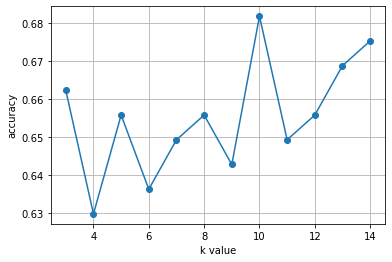

In [40]:
from sklearn.neighbors import KNeighborsClassifier
metric_k  = []
neighbors = np.arange(3, 15)


for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(x_train,y_train)
    knn_pred  =  knn_model.predict(x_test)
    knn_acc   =  accuracy_score(y_test,knn_pred)
    metric_k.append(knn_acc)
    
print(metric_k)   
    
    
#plotting graph

plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

#### On checking K value =10 

In [41]:
knn_10      =  KNeighborsClassifier(n_neighbors = 10)
knn_model_10 =  knn_10.fit(x_train,y_train)
knn_pred_10  =  knn_model_10.predict(x_test)
knn_pred_10

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [42]:
print(confusion_matrix(y_test, knn_pred))
print(accuracy_score(y_test, knn_pred))

[[ 7 47]
 [ 3 97]]
0.6753246753246753


### 3) Suppor Vector Machine (SVM) 

In [43]:
from sklearn.svm import SVC

##### 3.1 SVM =rbf 

In [44]:
svm_rbf       = SVC(kernel = "rbf")
svm_model_rbf = svm_rbf.fit(x_train, y_train)
y_pred_rbf    = svm_model_rbf.predict(x_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_rbf))
print(accuracy_score(y_test, y_pred_rbf))

[[  0  54]
 [  0 100]]
0.6493506493506493


##### 3.2 SVM = Linear  

In [45]:
#svm_linear       = SVC(kernel = "linear")
#svm_model_linear = svm_linear.fit(x_train, y_train)
#y_pred_linear    = svm_model_linear.predict(x_test)



# Confusion matrix and accuracy score

#print(confusion_matrix(y_test, y_pred_linear))
#print(accuracy_score(y_test, y_pred_linear))

##### 3.3 SVM=Poly 

In [46]:
svm_linear       = SVC(kernel = "poly")
svm_model_linear = svm_linear.fit(x_train, y_train)
y_pred_linear    = svm_model_linear.predict(x_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_linear))
print(accuracy_score(y_test, y_pred_linear))

[[  0  54]
 [  0 100]]
0.6493506493506493


### 4) Decision Tree  

In [47]:
from sklearn.tree import DecisionTreeClassifier 

dt         = DecisionTreeClassifier(random_state = 42)
dt_model   = dt.fit(x_train, y_train)
y_pred_dt  = dt_model.predict(x_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))

[[27 27]
 [19 81]]
0.7012987012987013


### 5) Random Forest 

In [48]:
from sklearn.ensemble import RandomForestClassifier 

rf       = RandomForestClassifier(random_state = 42)
rf_model = rf.fit(x_train, y_train)
y_pred_rf  = rf_model.predict(x_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

[[25 29]
 [ 6 94]]
0.7727272727272727


### 6) Naive Bays 

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score


gnb        = GaussianNB()
model_gnb  = gnb.fit(x_train ,y_train)
y_pred_gnb = model_gnb.predict(x_test)


# Confusion matrix and accuracy score

print(confusion_matrix(y_test,y_pred_gnb))   # 60 misclassifications
print(accuracy_score(y_test, y_pred_gnb))

[[22 32]
 [ 3 97]]
0.7727272727272727


### 7) Gradient Boosting Classifier 

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gbk        = GradientBoostingClassifier()
model_gbk  = gbk.fit(x_train ,y_train)
y_pred_gbk = model_gbk.predict(x_test)


# Confusion matrix and accuracy score

print(confusion_matrix(y_test,y_pred_gbk))  # 40 misclassifications
print(accuracy_score(y_test, y_pred_gbk))


[[20 34]
 [ 6 94]]
0.7402597402597403


**Observations**

1) Linear Regression -77%

2) KNN -67%

3) 3.1) SVM(rbf) -64%
   3.2) SVM(poly) -64%

5) Decision Tree -70%

6) Random Forest -77 %

7) Naive Bays -77%

8) Gradient Boosting Classifier -74%

### Test Data 

In [51]:
df_test = pd.read_csv('test_VC.csv',index_col='Loan_ID')

In [52]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [53]:
df_test.shape

(367, 11)

In [54]:
df_test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [55]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### Exploratory Data Analysis  

In [56]:
# Numerical features


num_feature_test = [features for features in df_test.columns if df_test[features].dtypes!="O"]
num_feature_test

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [57]:
# Checking for numerical values with missing values

numerical_nan_test = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes!='O']

for features in numerical_nan_test:
    print("{}:{} % missing values".format(features,np.round(df_test[features].isnull().mean(),4)))

LoanAmount:0.0136 % missing values
Loan_Amount_Term:0.0163 % missing values
Credit_History:0.079 % missing values


In [58]:
# Categorical Columns

cat_feature_test = [features for features in df_test.columns if df_test[features].dtypes=="O" and features !='Loan_Status']
cat_feature_test

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [59]:
# Checking with categorical values first

categorical_nan_test = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes=='O']

for features in categorical_nan_test:
    print("{}:{} % missing values".format(features,np.round(df_test[features].isnull().mean(),4)))

Gender:0.03 % missing values
Dependents:0.0272 % missing values
Self_Employed:0.0627 % missing values


C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


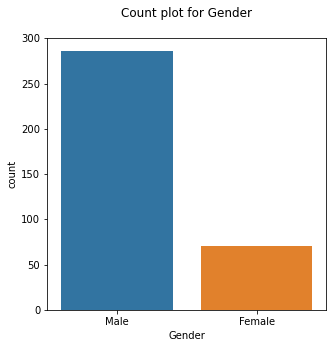

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


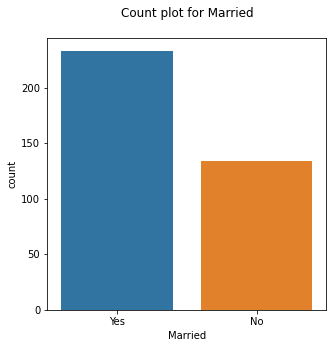

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


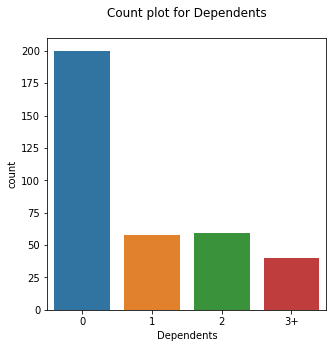

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


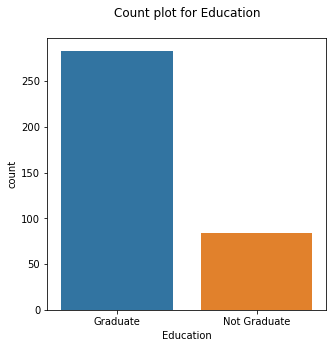

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


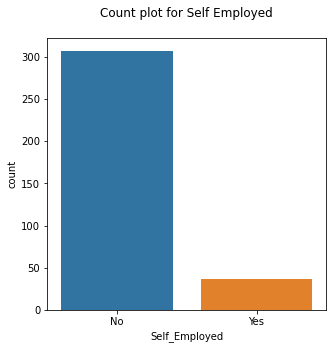

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


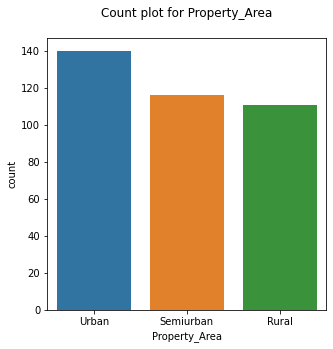

In [60]:
# Plotting Gender attribute

plt.figure(figsize=(5,5))
sns.countplot(df_test["Gender"])
plt.title("Count plot for Gender\n")
plt.show()


# Plotting Married attribute

plt.figure(figsize=(5,5))
sns.countplot(df_test["Married"])
plt.title("Count plot for Married\n")
plt.show()


# Plotting Dependents attribute

plt.figure(figsize=(5,5))
sns.countplot(df_test["Dependents"])
plt.title("Count plot for Dependents\n")
plt.show()



# Plotting Education attribute

plt.figure(figsize=(5,5))
sns.countplot(df_test["Education"])
plt.title("Count plot for Education\n")
plt.show()


# Plotting Self_Employed attribute

plt.figure(figsize=(5,5))
sns.countplot(df_test["Self_Employed"])
plt.title("Count plot for Self Employed\n")
plt.show()


# Plotting Property_Area attribute

plt.figure(figsize=(5,5))
sns.countplot(df_test["Property_Area"])
plt.title("Count plot for Property_Area\n")
plt.show()

#### Frequency Graph 

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

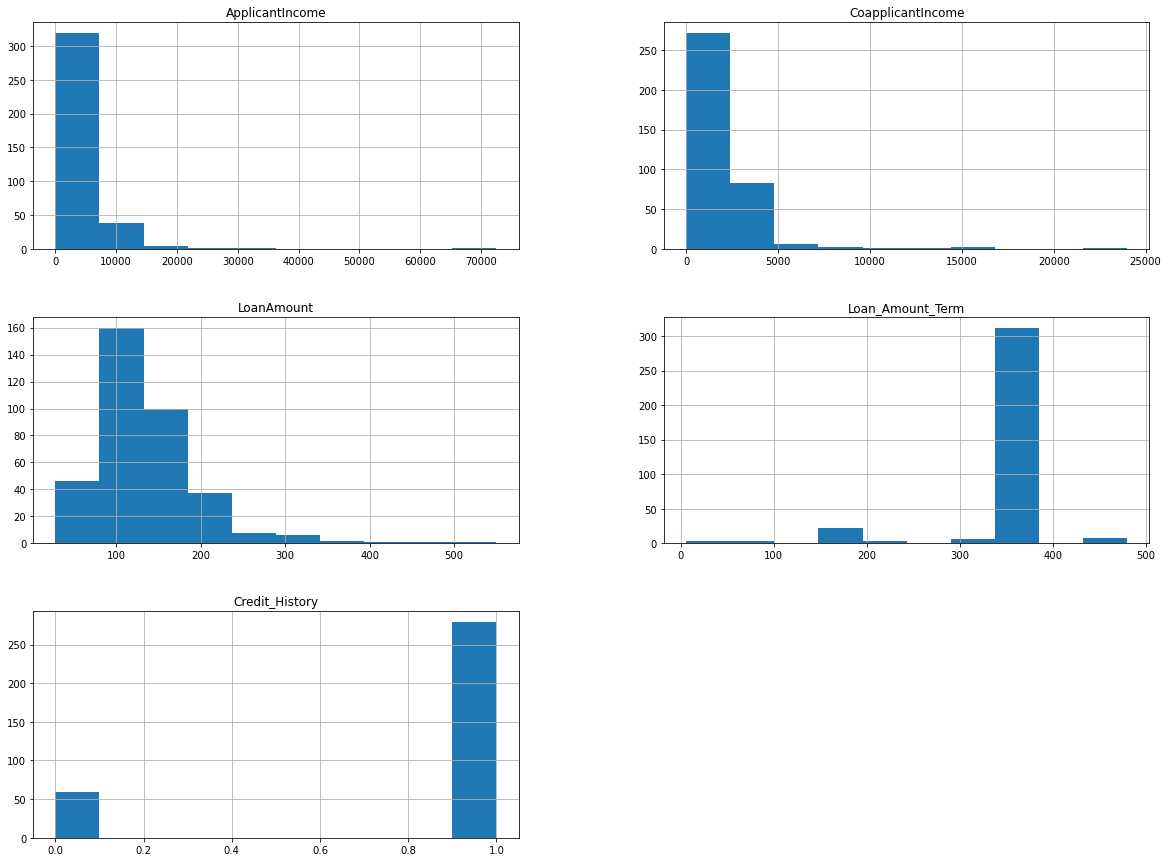

In [61]:
freq_graph = df_test.select_dtypes(include = ["float", "int"])
freq_graph.hist(figsize = (20, 15))

### Preprocessing  

In [62]:
#Finding null values

df_test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [63]:
df_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [64]:
# Filling the missing columns with median 

for i in ['LoanAmount' ]:
    df_test[i] = df_test[i].fillna(df_test[i].median())
    
    
    
    
# Filling the missing columns with mode

for i in ['Dependents', 'Self_Employed', 'Credit_History', 'Married', 'Gender','Loan_Amount_Term']:
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])
    
    
    
    
    
#Again Checking for Null values

df_test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Checking Skewness 

In [65]:
df_test.mean()

C:\Users\FISAL\AppData\Local\Temp\ipykernel_10080\495053571.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_test.mean()


ApplicantIncome      4805.599455
CoapplicantIncome    1569.577657
LoanAmount            135.980926
Loan_Amount_Term      342.822888
Credit_History          0.839237
dtype: float64

In [66]:
for i in num_feature:
    skew_data = df_test[i].skew()
    print(skew_data)

8.441374954190996
4.257356934477602
2.244600521260248
-2.709536758573826
-1.8547214446428353


#### Plotting Skewed Data  

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


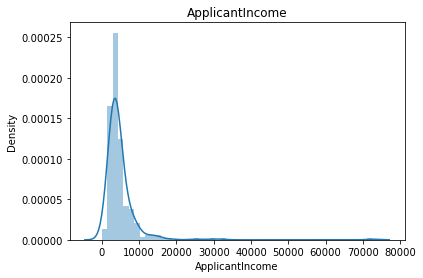

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


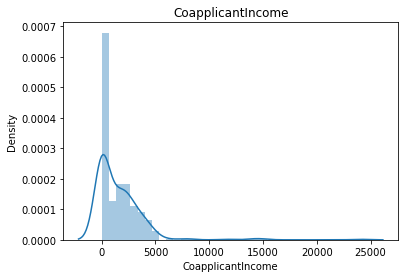

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


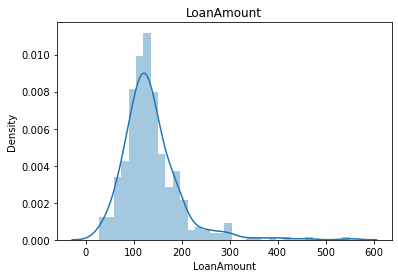

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


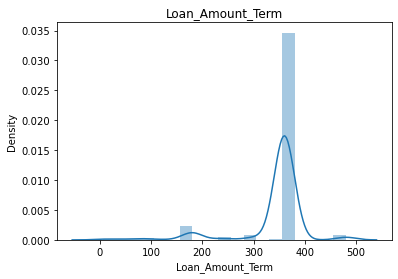

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


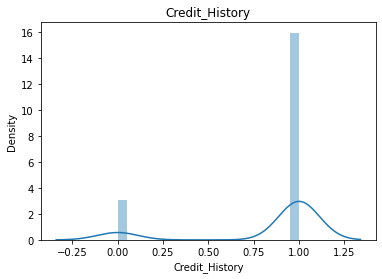

In [67]:
for i in num_feature:
    sns.distplot(df_test[i])
    plt.title(i)
    plt.show()

#### Removing Skewness 

In [68]:
from scipy.stats import boxcox

In [69]:
df_test['ApplicantIncome']=np.sqrt(df_test['ApplicantIncome'])

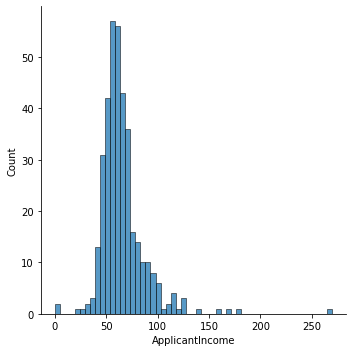

In [70]:
sns.displot(df_test['ApplicantIncome'])
plt.show()

In [71]:
df_test['LoanAmount']=np.log(df_test['LoanAmount'])

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


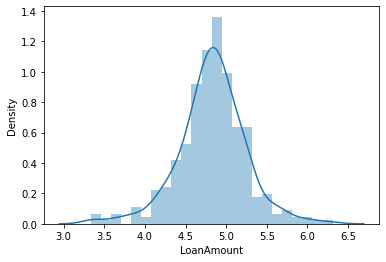

In [72]:
sns.distplot(df_test['LoanAmount'])
plt.show()

In [73]:
df_test['CoapplicantIncome']=np.sqrt(df_test['CoapplicantIncome'])

C:\Users\FISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


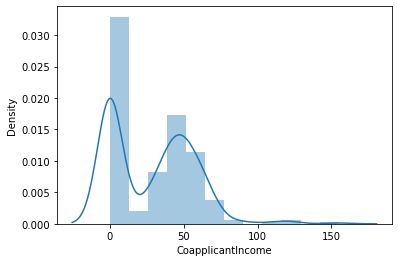

In [74]:
sns.distplot(df_test['CoapplicantIncome'])
plt.show()

In [75]:
for i in num_feature:
    skew_data = df_test[i].skew()
    print(skew_data)

3.1235253688962326
0.6342241441326674
-0.25079192261876976
-2.709536758573826
-1.8547214446428353


#### Outlier  

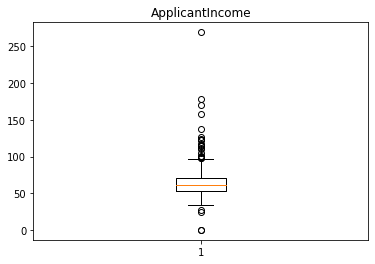

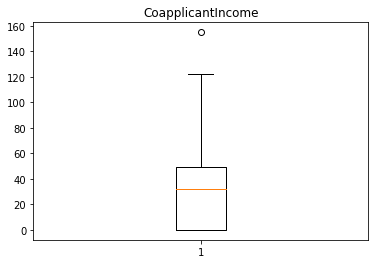

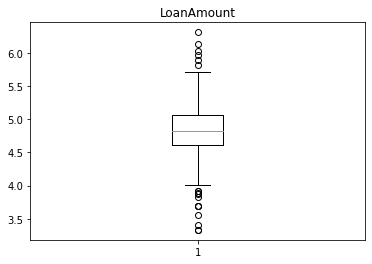

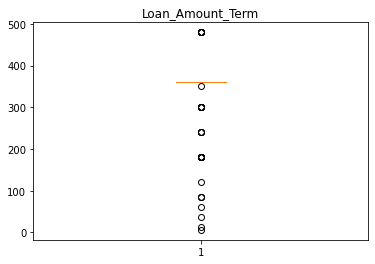

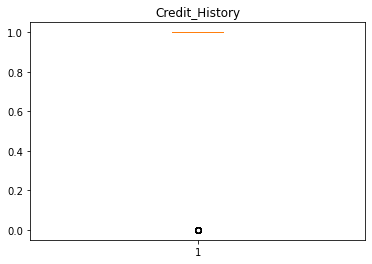

In [76]:
for i in num_feature:
    plt.boxplot(df_test[i])
    plt.title(i)
    plt.show()

#### Correlation Matrix 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.294168,0.419555,0.022904,0.135294
CoapplicantIncome,-0.294168,1.000000,0.173345,-0.016825,-0.052028
LoanAmount,0.419555,0.173345,1.000000,0.144465,-0.056299
Loan_Amount_Term,0.022904,-0.016825,0.144465,1.000000,-0.048189
Credit_History,0.135294,-0.052028,-0.056299,-0.048189,1.000000


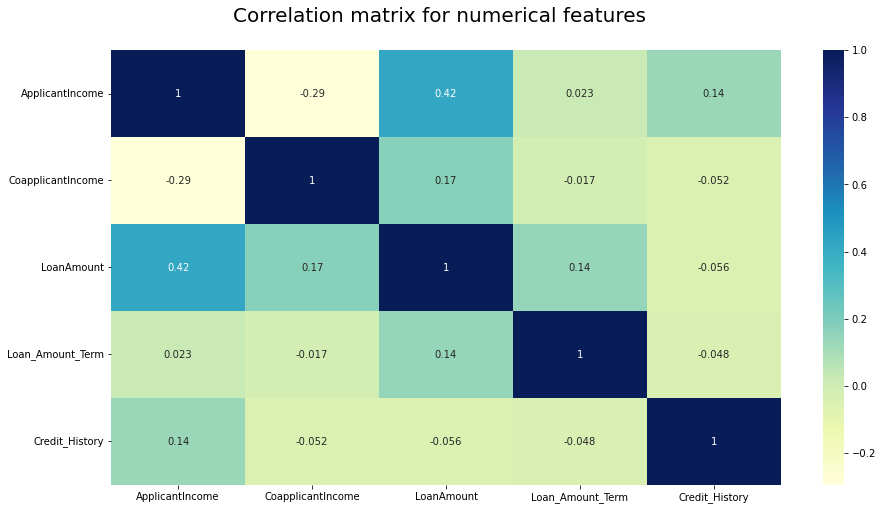

In [77]:
corrmatrix = df_test.corr()
plt.subplots(figsize =(15,8))
plt.title("Correlation matrix for numerical features  \n", size = 20)
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu")
corrmatrix

#### Label Encoding  

In [78]:
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    df_test[i] = le.fit_transform(df_test[i])

In [79]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0,0,0,75.630682,0.000000,4.700480,360.0,1.0,2
LP001022,1,1,1,0,0,55.461698,38.729833,4.836282,360.0,1.0,2
LP001031,1,1,2,0,0,70.710678,42.426407,5.337538,360.0,1.0,2
LP001035,1,1,2,0,0,48.373546,50.457903,4.605170,360.0,1.0,2
LP001051,1,0,0,1,0,57.236352,0.000000,4.356709,360.0,1.0,2


In [192]:
y_pred_test =gbk.predict(df_test)

In [193]:
df_Sample=pd.read_csv('sample_submission.csv')

In [194]:
df_Sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [195]:
df_Sample.shape

(367, 2)

In [196]:
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [197]:
y_pred_test.shape

(367,)

In [198]:
df_Sample['Loan_Status'] = y_pred_test

In [199]:
df_Sample

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [200]:
df_Sample["Loan_Status"].replace(0,"N",inplace=True)
df_Sample["Loan_Status"].replace(1,"Y",inplace=True)

In [201]:
df_Sample.to_csv('Gradient_Boosting.csv',index=False)

In [202]:
df_New = pd.read_csv('Gradient_Boosting.csv')

In [203]:
df_New.isnull().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

In [204]:
df_New


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [205]:
df_New['Loan_Status'].value_counts()

Y    291
N     76
Name: Loan_Status, dtype: int64